Mám diabetes prediction dataset a budu koukat, jaký mají vliv na přítomnost cukrovky růžné parametry jako jsou pohlaví, věk, hypertenze, srdeční choroby, kouření, BMI (index tělesné hmotnosti), hodnota glykovaného hemoglobinu (HbA1c), hodnota cukru(glukózy) v krvi.

Záprvé importujeme důležité knihovny, a podívejme se jak vypadá dataset.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Handle any missing values if necessary
df.dropna(inplace=True)

print(df.head())

| gender | age  | hypertension | heart_disease | smoking_history | bmi   | HbA1c_level | blood_glucose_level | diabetes |
|--------|------|--------------|---------------|-----------------|-------|-------------|---------------------|----------|
| Female | 80.0 | 0            | 1             | never           | 25.19 | 6.6         | 140                 | 0        |
| Female | 54.0 | 0            | 0             | No Info         | 27.32 | 6.6         | 80                  | 0        |
| Male   | 28.0 | 0            | 0             | never           | 27.32 | 5.7         | 158                 | 0        |
| Female | 36.0 | 0            | 0             | current         | 23.45 | 5.0         | 155                 | 0        |
| Male   | 76.0 | 1            | 1             | current         | 20.14 | 4.8         | 155                 | 0        |


In [ ]:
for column in ['gender', 'smoking_history']:
    unik = df[column].unique()
    print(f"Unique before preprocessing '{column}': {unik}\n")

label=LabelEncoder()

Unique before preprocessing 'gender': ['Female' 'Male' 'Other']

Unique before preprocessing 'smoking_history': ['never' 'No Info' 'current' 'former' 'ever' 'not current']

In [ ]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

for column in ['gender', 'smoking_history']:
    unik = df[column].unique()
    print(f"Unique after preprocessing '{column}': {unik}\n")

Unique after preprocessing 'gender': [0 1 2]

Unique after preprocessing 'smoking_history': [4 0 1 3 2 5]

Takže teď:
pro gender: Female = 0, Male = 1, Other = 2;
pro smoking_history: No Info = 0, current = 1, ever = 2, former = 3, never = 4, not current = 5.
A teprvé dataset vypádá takhle:

In [ ]:
print(df.head())

| gender | age  | hypertension | heart_disease | smoking_history | bmi   | HbA1c_level | blood_glucose_level | diabetes |
|--------|------|--------------|---------------|-----------------|-------|-------------|---------------------|----------|
| 0      | 80.0 | 0            | 1             | 4               | 25.19 | 6.6         | 140                 | 0        |
| 0      | 54.0 | 0            | 0             | 0               | 27.32 | 6.6         | 80                  | 0        |
| 1      | 28.0 | 0            | 0             | 4               | 27.32 | 5.7         | 158                 | 0        |
| 0      | 36.0 | 0            | 0             | 1               | 23.45 | 5.0         | 155                 | 0        |
| 1      | 76.0 | 1            | 1             | 1               | 20.14 | 4.8         | 155                 | 0        |


Můžeme se podívat ještě na popisné statistiky pro číselné sloupce (vyloučíme sloupce gender a smoking history a podíváme se na ně zvlášť).

In [ ]:
print(df.describe())

|       | gender        | age           | hypertension | heart_disease | smoking_history | bmi           | HbA1c_level   | blood_glucose_level| diabetes      | 
|-------|---------------|---------------|--------------|---------------|-----------------|---------------|---------------|--------------------|---------------| 
| count | 100000.000000 | 100000.000000 | 100000.00000 | 100000.000000 | 100000.000000   | 100000.000000 | 100000.000000 | 100000.000000      | 100000.000000 |
| mean  | 0.414660      | 41.885856     | 0.07485      | 0.039420      | 2.179650        | 27.320767     | 5.527507      | 138.058060         | 0.085000      |
| std   | 0.493031      | 22.516840     | 0.26315      | 0.194593      | 1.889659        | 6.636783      | 1.070672      | 40.708136          | 0.278883      |
| min   | 0.000000      | 0.080000      | 0.00000      | 0.000000      | 0.000000        | 10.010000     | 3.500000      | 80.000000          | 0.000000      |
| 25%   | 0.000000      | 24.000000     | 0.00000      | 0.000000      | 0.000000        | 23.630000     | 4.800000      | 100.000000         | 0.000000      |
| 50%   | 0.000000      | 43.000000     | 0.00000      | 0.000000      | 3.000000        | 27.320000     | 5.800000      | 140.000000         | 0.000000      |
| 75%   | 1.000000      | 60.000000     | 0.00000      | 0.000000      | 4.000000        | 29.580000     | 6.200000      | 159.000000         | 0.000000      |
| max   | 2.000000      | 80.000000     | 1.00000      | 1.000000      | 5.000000        | 95.690000     | 9.000000      | 300.000000         | 1.000000      |

In [ ]:
print(df['gender'].value_counts())
print(df['smoking_history'].value_counts())

Podívejme se na přesný počet lidí pro unikatní kategorie u parametrů gender a smoking_history. 

gender
<br>
0    58552
<br>
1    41430
<br>
2       18
<br>
Name: count, dtype: int64

smoking_history
<br>
0    35816
<br>
4    35095
<br>
3     9352
<br>
1     9286
<br>
5     6447
<br>
2     4004
<br>
Name: count, dtype: int64
 
Vzhledem k tomu, že počet jedinců s pohlavím typu 'Other' (kategorie 2) je velmi nízký (pouze 18 případů), rozhodla jsem se tuto kategorii vyloučit z analýzy vlivu pohlaví na cukrovku, protože neumožňuje spolehlivé statistické testování a mohla by zkreslit výsledky. Analýza se proto zaměřuje pouze na porovnání mezi muži a ženami.

In [ ]:
sns.countplot(x='gender',hue='diabetes',data=df[df['gender'] != 2])
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.legend(["No diabetes", "Diabetes"])
plt.show()

contingency_table_gender = pd.crosstab(df['gender'], df['diabetes'])
print(contingency_table_gender)


# Values from the table
A = contingency_table_gender.loc[1, 1]
B = contingency_table_gender.loc[1, 0]
C = contingency_table_gender.loc[0, 1]
D = contingency_table_gender.loc[0, 0]

# Calculation of odds ratio
odds_ratio = (A / B) / (C / D)
print(f"Poměr šancí (odds ratio) pro pohlaví: {odds_ratio}")

if odds_ratio > 1:
    print("Pravděpodobnost diabetu je vyšší u mužů.")
elif odds_ratio < 1:
    print("Pravděpodobnost diabetu je nižší u žen.")
else:
    print("Pravděpodobnost diabetu je stejná u mužů a žen")

# Chi-Square test for gender
chi2, p, _, _ = chi2_contingency(contingency_table_gender)
print(f"Chí-kvadrát test na pohlaví: chi2 = {chi2}, p = {p}")

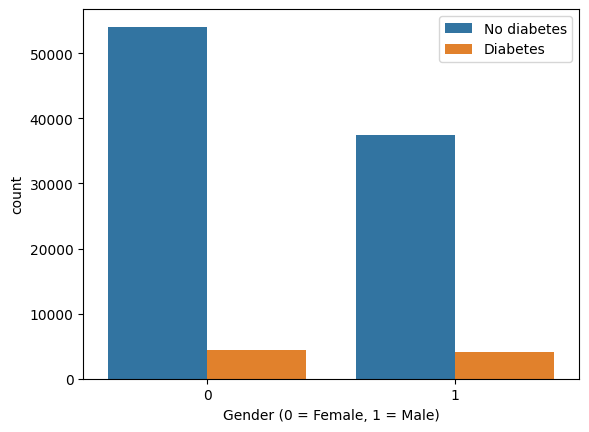

| diabetes | 0     | 1    |
|----------|-------|------|
| gender   |       |      | 
| 0        | 54091 | 4461 |
| 1        | 37391 | 4039 |
| 2        | 18    | 0    |

Poměr šancí (odds ratio) pro pohlaví: 1.3097836358553452
<br>
Pravděpodobnost diabetu je vyšší u mužů.

Pro nulovou hypotézu "Neexistuje statisticky významný vztah mezi genderem a výskytem diabetu", a hladinu vyznamnosti 0,05 jsou:
<br>
Chí-kvadrát test na pohlaví: chi2 = 143.21825102550298, p = 7.953383718307458e-32
<br>
Nulovou hypotézu můžeme zamítnout. To znamená, že existuje statisticky významný vztah mezi genderem a výskytem diabetu. Jinými slovy, rozložení diabetu není mezi muži, ženami a ostatními rovnoměrné.

In [ ]:
sns.countplot(x='hypertension',hue='diabetes',data=df)
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.legend(["No diabetes", "Diabetes"])
plt.show()

contingency_table_hypertension = pd.crosstab(df['hypertension'], df['diabetes'])
print(contingency_table_hypertension)

# Values from the table
A = contingency_table_hypertension.loc[1, 1]
B = contingency_table_hypertension.loc[1, 0]
C = contingency_table_hypertension.loc[0, 1]
D = contingency_table_hypertension.loc[0, 0]

# Calculation of odds ratio
odds_ratio = (A / B) / (C / D)
print(f"Poměr šancí (odds ratio) pro hypertenze: {odds_ratio}")

if odds_ratio > 1:
    print("Pravděpodobnost diabetu je vyšší u lidí s hypertenzí.")
elif odds_ratio < 1:
    print("Pravděpodobnost diabetu je nižší u lidí s hypertenzí.")
else:
    print("Pravděpodobnost diabetu je stejná u lidí s hypertenzí i bez ní.")

# Chi-Square test for hypertension
chi2, p, _, _ = chi2_contingency(contingency_table_hypertension)
print(f"Chí-kvadrát test na hypertenzi: chi2 = {chi2}, p = {p}")

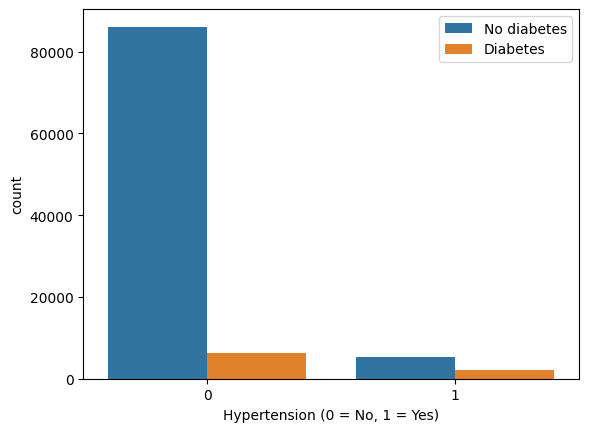

| diabetes     | 0     | 1    |
|--------------|-------|------|
| hypertension |       |      | 
| 0            | 86103 | 6412 |
| 1            | 5397  | 2088 |

Poměr šancí (odds ratio) pro hypertenze: 5.1952068748251
<br>
Pravděpodobnost diabetu je vyšší u lidí s hypertenzí.

Pro nulovou hypotézu "Neexistuje statisticky významný vztah mezi výskytem hypertenzí a diabetu", a hladinu vyznamnosti 0,05 jsou:
<br>
Chí-kvadrát test na hypertenzi: chi2 = 3910.708546826595, p = 0.0
<br>
Nulovou hypotézu můžeme zamítnout. To indikuje velmi silný vztah mezi hypertenzí a diabetem. Lidé s hypertenzí mají významně odlišnou pravděpodobnost mít diabetes ve srovnání s těmi bez hypertenze.

In [ ]:
sns.countplot(x='heart_disease',hue='diabetes',data=df)
plt.xlabel('Heart disease (0 = No, 1 = Yes)')
plt.legend(["No diabetes", "Diabetes"])
plt.show()

contingency_table_heart_disease = pd.crosstab(df['heart_disease'], df['diabetes'])
print(contingency_table_heart_disease)

# Values from the table
A = contingency_table_heart_disease.loc[1, 1]
B = contingency_table_heart_disease.loc[1, 0]
C = contingency_table_heart_disease.loc[0, 1]
D = contingency_table_heart_disease.loc[0, 0]

# Calculation of odds ratio
odds_ratio = (A / B) / (C / D)
print(f"Poměr šancí (odds ratio) pro srdeční choroby: {odds_ratio}")

if odds_ratio > 1:
    print("Pravděpodobnost diabetu je vyšší u lidí se srdečními choroby.")
elif odds_ratio < 1:
    print("Pravděpodobnost diabetu je nižší u lidí se srdečními choroby.")
else:
    print("Pravděpodobnost diabetu je stejná u lidí se srdečními choroby i bez nich.")


# Chi-Square test for heart disease
chi2, p, _, _ = chi2_contingency(contingency_table_heart_disease)
print(f"Chí-kvadrát test na srdeční choroby: chi2 = {chi2}, p = {p}")


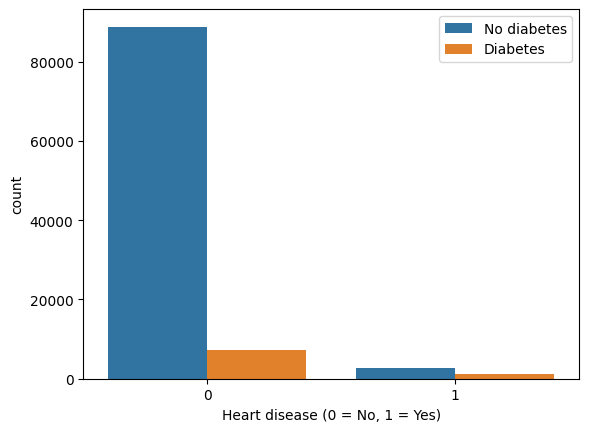

| diabetes      | 0     | 1    |
|---------------|-------|------|
| heart_disease |       |      | 
| 0             | 88825 | 7233 |
| 1             | 2675  | 1267 |

Poměr šancí (odds ratio) pro srdeční choroby: 5.816605097870482
<br>
Pravděpodobnost diabetu je vyšší u lidí se srdečními choroby.

Pro nulovou hypotézu "Neexistuje statisticky významný vztah mezi výskytem srdečních onemocnění a diabetu", a hladinu vyznamnosti 0,05 jsou:
<br>
Chí-kvadrát test na srdeční choroby: chi2 = 2945.847521829186, p = 0.0
<br>
Nulovou hypotézu můžeme zamítnout. To ukazuje na velmi silný vztah mezi srdečním onemocněním a diabetem. Lidé se srdečním onemocněním mají významně odlišnou pravděpodobnost mít diabetes ve srovnání s těmi bez srdečního onemocnění.

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(x='smoking_history',hue='diabetes',data=df)
plt.xlabel('Smoking history (0 = No Info, 1 = current, 2 = ever, 3 = former, 4 = never, 5 = not current.)')
plt.legend(["No diabetes", "Diabetes"])
plt.show()

contingency_table_smoking_history = pd.crosstab(df['smoking_history'], df['diabetes'])
print(contingency_table_smoking_history)

a1 = contingency_table_smoking_history.loc[1, 1]
b1 = contingency_table_smoking_history.loc[1, 0]
a2 = contingency_table_smoking_history.loc[2, 1]
b2 = contingency_table_smoking_history.loc[2, 0]
a3 = contingency_table_smoking_history.loc[3, 1]
b3 = contingency_table_smoking_history.loc[3, 0]
a4 = contingency_table_smoking_history.loc[4, 1]
b4 = contingency_table_smoking_history.loc[4, 0]
a5 = contingency_table_smoking_history.loc[5, 1]
b5 = contingency_table_smoking_history.loc[5, 0]

print(f"Pravdepodobnost pro 1: {a1/(a1+b1)}, pro 2: {a2/(a2+b2)}, pro 3: {a3/(a3+b3)}, pro 4: {a4/(a4+b4)}, pro 5: {a5/(a5+b5)}")

chi2, p, dof, expected = chi2_contingency(contingency_table_smoking_history)
print(f"Chi-Square Test: Chi2 = {chi2}, p-value = {p}")

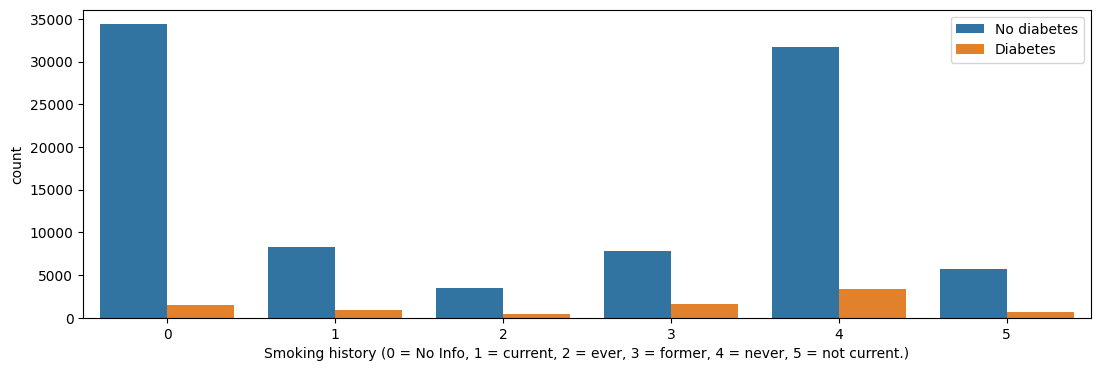

|diabetes        | 0     | 1    |
|----------------|-------|------|
|smoking_history |       |      |
|0               | 34362 | 1454 |
|1               | 8338  | 948  |
|2               | 3532  | 472  |
|3               | 7762  | 1590 |
|4               | 31749 | 3346 |
|5               | 5757  | 690  |

Pravdepodobnost pro 1: 0.10208916648718501, pro 2: 0.11788211788211789, pro 3: 0.17001710863986313, pro 4: 0.09534121669753526, pro 5: 0.10702652396463472


Smoking history = 0, je kategorie No Info, takže vynecháme z analýzy jednotky z této kategorii, protože nic nemůžeme ríct o jejich kuřáckém navýku. Dál spočítáme pravděpodobnost, že člověk má cukrovku z určíté kategorií smoking history:
<br>
1(current): 0.10208916648718501
<br>
2(ever): 0.11788211788211789
<br>
3(former): 0.17001710863986313
<br>
4(never): 0.09534121669753526
<br>
5(not current): 0.10702652396463472

Vidíme, že u 3 kategorie (former) je největší poměr lidí s cukrovkou ke všem z teto kategorie. Tento výsledek není úplně spolehlivý, protože data jsou nevyvážené podle kategorií.

Pro nulovou hypotézu "Neexistuje statisticky významný vztah mezi kouřením a diabetem", a hladinu vyznamnosti 0,05 jsou:
<br>
Chi-Square Test: Chi2 = 1956.0944200848764, p-value = 0.0
<br>
Nulovou hypotézu můžeme zamítnout. Takže existuje statisticky významný vztah mezi kouřením a diabetem.

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(x='HbA1c_level',hue='diabetes',data=df)
plt.legend(["No diabetes", "Diabetes"])
plt.show()

contingency_table_HbA1c_level = pd.crosstab(df['HbA1c_level'], df['diabetes'])
print(contingency_table_HbA1c_level)

plt.figure(figsize=(13,4))
sns.countplot(x='blood_glucose_level',hue='diabetes',data=df)
plt.legend(["No diabetes", "Diabetes"])
plt.show()

contingency_table_blood_glucose_level = pd.crosstab(df['blood_glucose_level'], df['diabetes'])
print(contingency_table_blood_glucose_level)

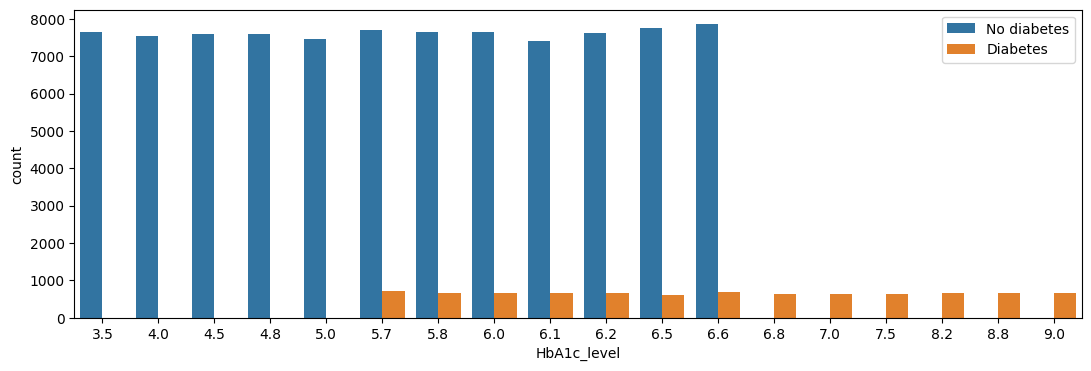

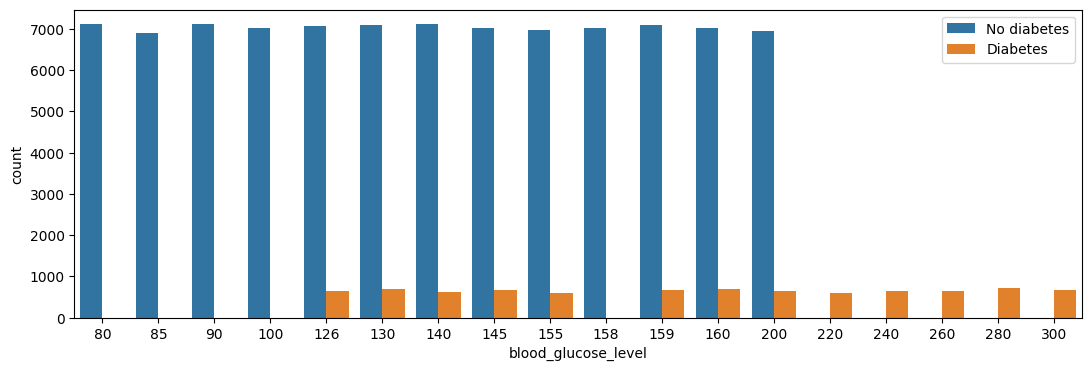

Podle grafu HbA1c_level a kontingenční tabulky, vidíme, že lidí s 5.7 <= HbA1c_level <= 6.6 s pravděpodobnost kolem 0,08 mají cukrovku, přičemž lidí, které mají HbA1c_level pod 5,7 mají cukrovku s pravděpodobností 0 (tedy určitě nemají cukrovku) a lidí, které mají HbA1c_level nad 6,6 mají cukrovku s pravděpodobností 1 (tedy určitě mají cukrovku).

Podle grafu blood_glucose_level a kontingenční tabulky, vidíme, že lidí s 126 <= blood_glucose_level <= 200 s pravděpodobnost kolem 0,08 mají cukrovku, přičemž lidí, které mají blood_glucose_level pod 126 mají cukrovku s pravděpodobností 0 (tedy určitě nemají cukrovku) a lidí, které mají blood_glucose_level nad 200 mají cukrovku s pravděpodobností 1 (tedy určitě mají cukrovku). Tady je vyjímka u lidí s blood_glucose_level = 158, oni všichni nemají cukrovku, ale předpokladám, že to je buď chyba v datasetu nebo náhoda, ale ne sekvence.

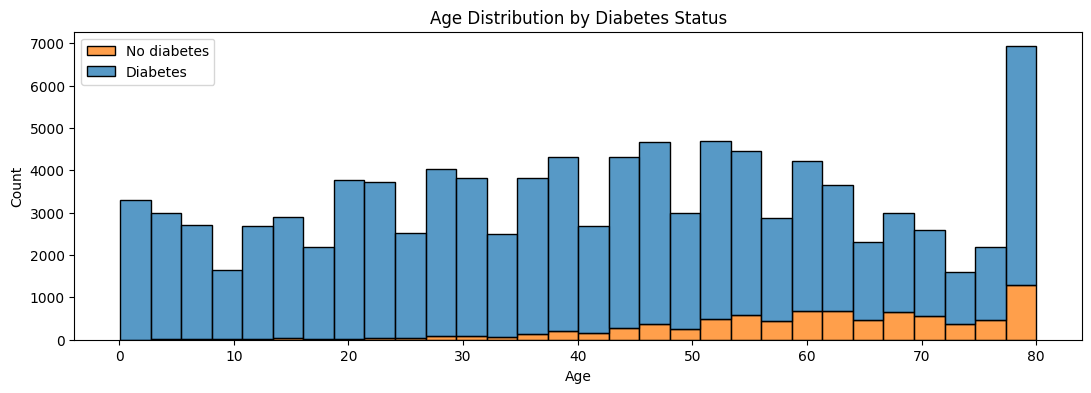

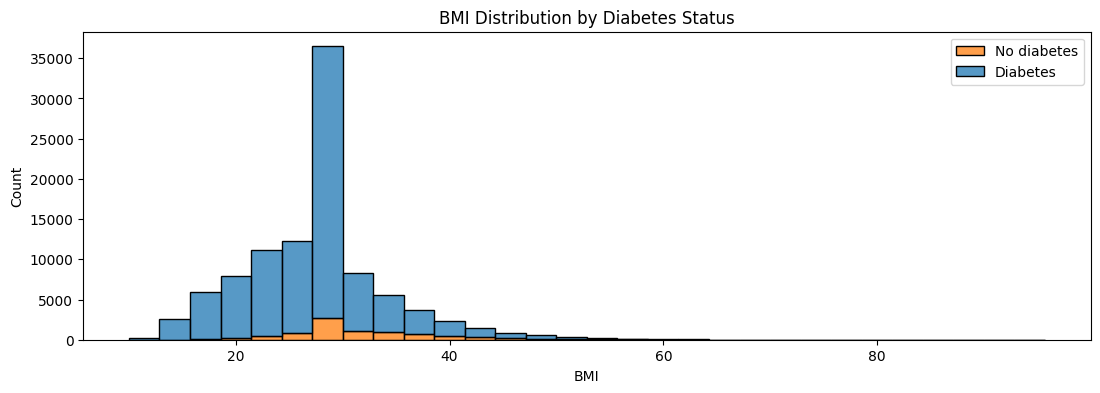

In [263]:
plt.figure(figsize=(13,4)) 
sns.histplot(x='age', hue='diabetes', data=df, kde=False, bins=30, multiple="stack")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(["No diabetes", "Diabetes"])
plt.title('Age Distribution by Diabetes Status')
plt.show()

plt.figure(figsize=(13,4)) 
sns.histplot(x='bmi', hue='diabetes', data=df, kde=False, bins=30, multiple="stack")
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(["No diabetes", "Diabetes"])
plt.title('BMI Distribution by Diabetes Status')
plt.show()

In [ ]:
# Creation of age categories
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80], labels=['Youth', 'Young Adult', 'Adult', 'Older Adult', 'Senior'])

# Creating BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

sns.countplot(x='age_group',hue='diabetes',data=df)
plt.legend(["No diabetes", "Diabetes"])
plt.show()

sns.countplot(x='bmi_category',hue='diabetes',data=df)
plt.legend(["No diabetes", "Diabetes"])
plt.show()


contingency_table_age = pd.crosstab(df['age_group'], df['diabetes'])
contingency_table_bmi = pd.crosstab(df['bmi_category'], df['diabetes'])

chi2_age, p_age, dof_age, expected_age = chi2_contingency(contingency_table_age)
chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(contingency_table_bmi)

print(f"Chi-Square Test for Age Groups: chi2 = {chi2_age}, p = {p_age}")
print(f"Chi-Square Test for BMI Categories: chi2 = {chi2_bmi}, p = {p_bmi}")

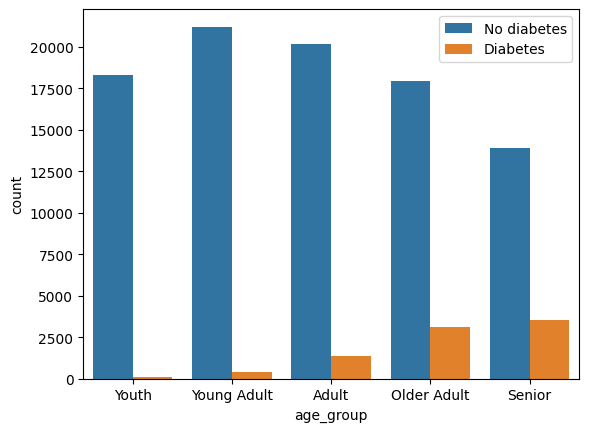

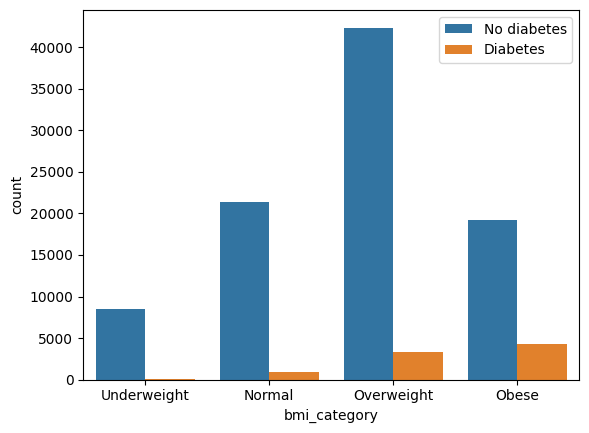

Věk rozdělím do skupin, jako jsou: mládež (0–18 let), mladí dospělí (19–35 let), dospělí (36–50 let), starší dospělí (51–65 let) a senioři (66+ let).
<br>
BMI rozdělím na: podváhu (BMI < 18.5), normální hmotnost (18.5 ≤ BMI < 25), nadváhu (25 ≤ BMI < 30) a obezitu (BMI ≥ 30).

Pro nulovou hypotézu "Neexistuje statisticky významný vztah mezi věkem a diabetem", a hladinu vyznamnosti 0,05 jsou:
<br>
Chi-Square Test for Age Groups: chi2 = 7117.653227656276, p = 0.0
<br>
Nulovou hypotézu můžeme zamítnout. Takže existuje statisticky významný vztah mezi věkem a diabetem.

Pro nulovou hypotézu "Neexistuje statisticky významný vztah mezi BMI katogorií a diabetem", a hladinu vyznamnosti 0,05 jsou:
<br>
Chi-Square Test for BMI Categories: chi2 = 4088.9010974622825, p = 0.0
<br>
Nulovou hypotézu můžeme zamítnout. Takže existuje statisticky významný vztah mezi BMI katogorií a diabetem.

In [267]:
# Building a model with BMI and age as predictors
X = df[['age', 'bmi']]  
X = sm.add_constant(X)  # Adding a constant (intercept)
y = df['diabetes']

# Creating and training a logistic model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.239049
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99997
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.1780
Time:                        23:43:06   Log-Likelihood:                -23905.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9390      0.076   -104.391      0.000      -8.088      -7.790
age            0.0528      0.

Podle Logit Regression Results: koeficient pro věk je 0,0528 a pro bmi je 0,0948. Tyto pozitivní koeficienty naznačují, že s rostoucím věkem nebo BMI se zvyšuje pravděpodobnost diabetu. Například s každým zvýšením BMI o jednu jednotku se logaritmická pravděpodobnost diabetu zvýší o 0,0948.

In [ ]:
plt.figure(figsize=(13,6))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age Distribution by Diabetes Status')
plt.show()

plt.figure(figsize=(13,6))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.show()

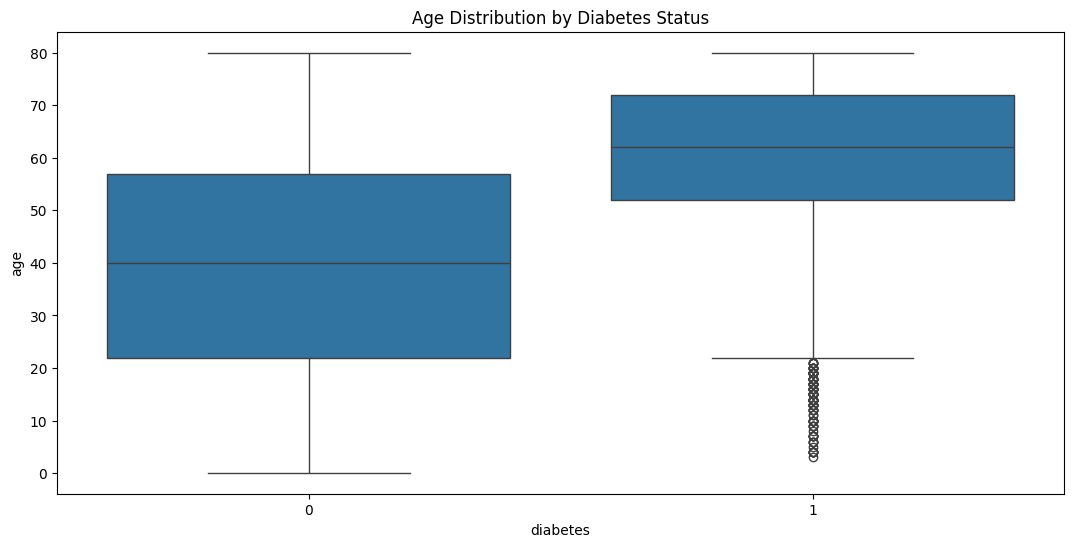

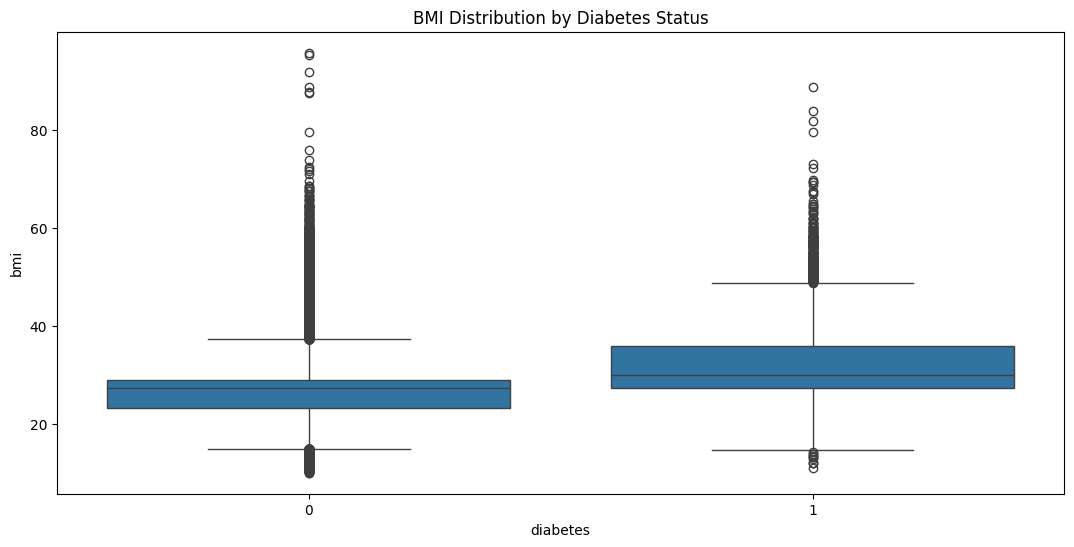

První graf porovnává rozdělení věku mezi lidmi s cukrovkou (1) a těmi, kteří ji nemají (0).

Pro lidi bez diabetu (0): Střední věk je kolem 45 let a IQR sahá od 30 do 60. Vousky ukazují, že nejmladším jedincům v této skupině je kolem 0 let, zatímco nejstarším 80. To naznačuje, že rozdělení věku mezi lidmi bez diabetu je široké, s mnoha lidmi středního věku.

Pro lidi s diabetem (1): Střední věk je výrazně vyšší, kolem 60 let, a IQR je přísnější, pohybuje se od 50 do 70. Vousky vykazují některé mladší odlehlé hodnoty (pod 20 let), ale většina lidí s cukrovkou bývají starší.

Takže, lidé s diabetem jsou obecně starší, s průměrným věkem 60 let ve srovnání s průměrným věkem kolem 45 let u lidí bez diabetu. Existuje několik mladých jedinců, kteří mají cukrovku, ale jedná se o odlehlé hodnoty, což znamená, že v tomto souboru dat není běžné, aby mladí lidé měli cukrovku.

<br>
<br>

Druhý graf porovnává rozložení BMI mezi lidmi cukrovkou (1) a těmi, kteří ji nemají (0).

Pro lidé bez diabetu (0): Střední BMI je kolem 25 a IQR sahá od přibližně 20 do 30. Existuje značný počet odlehlých hodnot nad 40 BMI, přičemž některé extrémní hodnoty dosahují až 80. Vousky sahají od přibližně 15 do 40, což naznačuje, že většina lidí bez diabetu má BMI v tomto rozmezí.

Pro lidé s diabetem (1): Střední BMI u lidí s diabetem je vyšší, kolem 30, IQR se pohybuje od 25 do 35. Existuje také mnoho odlehlých hodnot pro lidi s diabetem, i když distribuce odlehlých hodnot je méně extrémní než u osob bez diabetu. Vousy jsou více stlačené, sahají od asi 20 do 40.

Takže jedinci s diabetem mají obecně vyšší střední BMI ve srovnání s lidmi bez diabetu. Rozšíření BMI u lidí s diabetem je těsnější, což naznačuje větší konzistenci kolem vyšších úrovní BMI.